# RestAPI Project - Data scrap HTML, create CSV and load into SQL Database





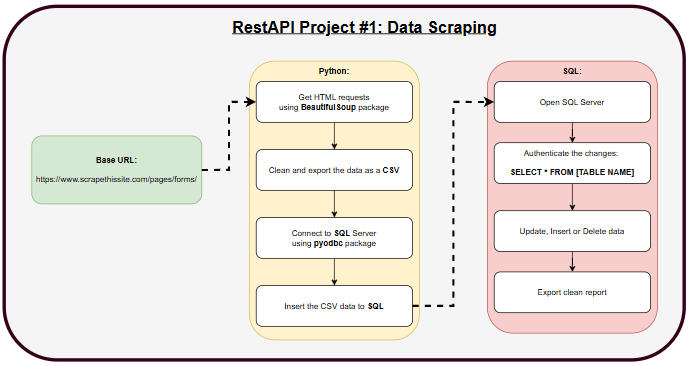

## Objective:

- Scrap data from an existing HTML website
- Create and export the data as a CSV
- Send the CSV data to your SQL server

## Approach 

- HTML to scrap: **[BASE URL](https://www.scrapethissite.com/pages/forms/)**
- Create a dataset and label as **hockey.csv**
- Connect to your SQL server using the **pyodbc** Python package

# Data Scraping HTML

## Load the Required Packages

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 
import nbconvert
import pyppeteer
import requests
import pyodbc
import pandoc
import csv
import os

## Get HTML Requests

In [24]:
url = 'https://www.scrapethissite.com/pages/forms/?per_page=100'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

#print(soup)

## Get Table Headers

In [25]:
# Get Table Headers
soup.find_all('table')[0]

table = soup.find_all('table')[0]
#print(table)

## Get Headers

In [26]:
# Get Headers
soup.find_all('th')
world_titles = table.find_all('th')
#print(world_titles)

# Clean Headers
world_table_titles = [title.text.strip() for title in world_titles]

print(world_table_titles)

['Team Name', 'Year', 'Wins', 'Losses', 'OT Losses', 'Win %', 'Goals For (GF)', 'Goals Against (GA)', '+ / -']


## Import Data as Dataframe

In [27]:
# import data as Dataframe
df = pd.DataFrame(columns = world_table_titles)
#df

# tr = Row
column_data = table.find_all('tr')
#print(column_data)


# td = row data
"""
1. Loop through 'tr' (row of data)
2. Loop and find individual data ('td')
3. Take that data and strip + create a list ('data.text.strip()')
4. Append each row location to a new position ('len(DF)')
"""

for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    #print(individual_row_data)
    
    length = len(df)
    df.loc[length] = individual_row_data

# View the dataset
df

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,,0.55,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25
...,...,...,...,...,...,...,...,...,...
95,Buffalo Sabres,1994,22,19,,0.458,130,119,11
96,Calgary Flames,1994,24,17,,0.5,163,135,28
97,Chicago Blackhawks,1994,24,19,,0.5,156,115,41
98,Dallas Stars,1994,17,23,,0.354,136,135,1


## (Optional) Drop multiple columns

In [28]:
# Drop columns
df = df.drop(['OT Losses'], axis = 1)

# View the changes
df.head()

,Team Name,Year,Wins,Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,0.55,299,264,35
1,Buffalo Sabres,1990,31,30,0.388,292,278,14
2,Calgary Flames,1990,46,26,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,0.425,273,298,-25


## (Optional) Rename headers

In [29]:
# Rename headers
header_names = ['Team_Name','Year','Wins','Losses','Win_Percent','Goals_For','Goals_Against','Plus_Minus']
clean_file=pd.read_csv(r'C:\Users\chavezk\Desktop\Python\DataScraping_Files\hockey_data.csv',header=None,skiprows=1,names=header_names)

clean_file.head()

,Team_Name,Year,Wins,Losses,Win_Percent,Goals_For,Goals_Against,Plus_Minus
Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
Calgary Flames,1990,46,26,NaN,0.575,344,263,81
Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25
Edmonton Oilers,1990,37,37,NaN,0.463,272,272,0


## Convert Dataframe (df) to CSV

In [32]:
# Push Dataframe to CSV
df.to_csv(r'C:\Users\chavezk\Desktop\Python\DataScraping_Files\hockey_data.csv', header=0, index=0)

#To write use index=0
#To read use index_col=0

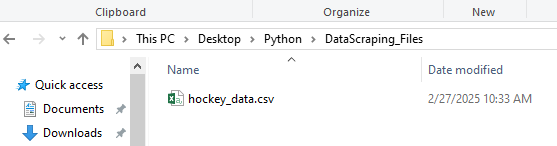

# Send CSV to SQL Server

## Connect to SQL Server in Python

In [33]:
# Connect to the SQL DB
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost;'
                      'Database=hockey_db;'
                      'Trusted_Connection=Yes;')
cursor = conn.cursor()

# Start the connection:
print('BEGIN TRANSACTION...')

BEGIN TRANSACTION...


## Create a Table

In [ ]:
# Create Table
sql ='''CREATE TABLE hockey(
   Team_Name CHAR(255),
   Year INT,
   Wins INT,
   Losses INT,
   Wins_Percent FLOAT,
   Goals_For INT,
   Goals_Against INT,
   Plus_Minus INT
);'''

# Execute the changes
cursor.execute(sql)

In [36]:
# Commit the changes
conn.commit()
print('COMMIT TRANSACTION')

COMMIT TRANSACTION


In [37]:
# Close the connection once done
conn.close()
print('END TRANSACTION...')

END TRANSACTION...


## (optional) Drop a Table

In [ ]:
# take out comments """xxx""" on this script
# make sure to uncomment #DROP Table [TABLE NAME]

"""


# Start the connection:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost;'
                      'Database=hockey_db;'
                      'Trusted_Connection=Yes;')
cursor = conn.cursor()

# Drop
sql = """
#DROP TABLE hockey          
"""
cursor.execute(sql)

# Commit the changes
conn.commit()
# Close the connection once done
conn.close()


"""

## View CSV file

In [41]:
hockey_df = pd.read_csv(r"C:\Users\chavezk\Desktop\Python\DataScraping_Files\hockey_data.csv", header=0, index_col=0)
hockey_df.head()

,1990,44,24,0.55,299,264,35
Boston Bruins,,,,,,,
Buffalo Sabres,1990,31,30,0.388,292,278,14
Calgary Flames,1990,46,26,0.575,344,263,81
Chicago Blackhawks,1990,49,23,0.613,284,211,73
Detroit Red Wings,1990,34,38,0.425,273,298,-25
Edmonton Oilers,1990,37,37,0.463,272,272,0


## Insert Data into Database

In [43]:
# Start the connection:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost;'
                      'Database=hockey_db;'
                      'Trusted_Connection=Yes;')
cursor = conn.cursor()

#
print('BEGIN TRANSACTION')

BEGIN TRANSACTION


### **Note:** make sure the newly created .CSV is in your folder directory
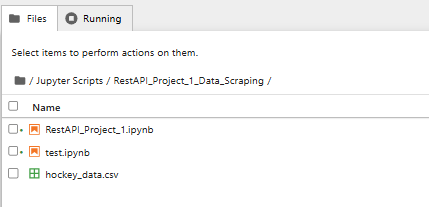

In [44]:
# Insert CSV data into the table
with open('hockey_data.csv','r') as file:
    csv_data = csv.reader(file)
    next(csv_data) #Skip header
    for row in csv_data:
        cursor.execute("INSERT INTO hockey(Team_Name, Year, Wins, Losses, Wins_Percent, Goals_For, Goals_Against, Plus_Minus) VALUES (?,?,?,?,?,?,?,?)", row)
        

In [45]:
# Commit the changes
conn.commit()

In [46]:
# Close the connection once done
conn.close()

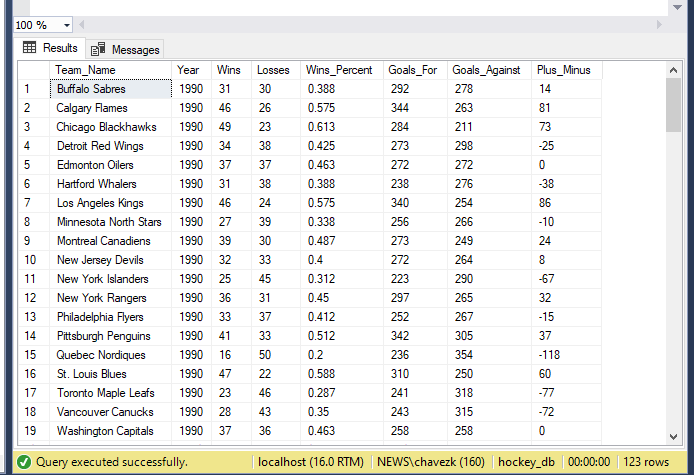

# Guides I used: 

- [
Python Connect with MS SQL Server | pyodbc Driver | How to Connect to SQL Server with Python](https://www.youtube.com/watch?v=I4_-l_zFHlw&list=PLHpdSsDL8VgsFgK1foT_H0ryuP99Mot1d&index=6)
- [Converting CSV to SQL with Python](https://www.youtube.com/watch?v=x8i9haDHR0s&list=PLHpdSsDL8VgupQepPdSbz4TuIGOz5Nuab&index=9)
- [Scraping Data from a Real Website | Web Scraping in Python](https://www.youtube.com/watch?v=8dTpNajxaH0&list=PLHpdSsDL8VgupQepPdSbz4TuIGOz5Nuab&index=7)
- [BeautifulSoup + Requests | Web Scraping in Python](https://www.youtube.com/watch?v=bargNl2WeN4&list=PLHpdSsDL8VgupQepPdSbz4TuIGOz5Nuab&index=8)
- [Import CSV file to SQL Server Using Python | SQL | Python](https://www.youtube.com/watch?v=FStvfHABnNc&list=PLHpdSsDL8VgupQepPdSbz4TuIGOz5Nuab&index=5)
- [Using Markdown in Jupyter](https://www.youtube.com/watch?v=uVLzL5E-YBM)